<center><h5> Data Science For Suppy Chain & Operations </h5></center>
<center><h3> Etude de cas d'évaluation </h3></center>
<center><h1> Clustering de magasins </h1></center>

*Remplir ici votre compréhension du contexte et des objectifs*

# I. Chargement et création du jeu de données

In [288]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [289]:
#Ceci permet d'afficher 
pd.options.display.max_columns = 100
pd.options.display.max_rows  = 100

In [290]:
mag = pd.read_csv("magasins.csv", encoding = "latin", sep = ";", decimal = ',') #Le paramètre decimal définit comment est représenter la virgule des chiffres décimaux
ref = pd.read_csv("references_ete.csv", encoding = "latin", sep = ";")
ventes = pd.read_csv("ventes.csv", encoding = "latin", sep = ";")

## I.1. Exploration, nettoyage et préparation des données

Nous allons procéder à l'exploration des différents fichiers fournis et au nettoyage de chacun des fichiers

### I.1.1. Exploration des fichiers 

In [291]:
mag.head()


,Réseau,Pays magasin,Magasin,Code magasin,Type boutique,Surface magasin (*),Climat,Environnement concurrentiel,Traffic,Clientèle,Saisonnalité,Géographie,Mall,Comportement d'achat,Panier moyen  HT (Taux budget),Indice de vente
0,RETAIL EUROPE,UNITED KINGDOM,Magasin_99,286,GM,55.0,FROID,PREMIUM,LOW,LOCALE,PAS SAISONNIERE,CENTRE PETITE VILLE,OUI,CLIENT FULL PRICE,267.438950,1.297333
1,RETAIL EUROPE,FRANCE,Magasin_49,381,GM,22.0,CHAUD,NaN,NaN,NaN,NaN,NaN,OUI,CLIENT FULL PRICE,207.102617,1.132231
2,RETAIL EUROPE,FRANCE,Magasin_39,41,GM,75.0,TEMPERE,PREMIUM,LOW,LOCALE,PAS SAISONNIERE,CENTRE PETITE VILLE,OUI,CLIENT DISCOUNT,195.375729,1.198321
3,RETAIL EUROPE,ALLEMAGNE,Magasin_193,303,BOUTIQUE,139.0,TEMPERE,LUXE,LOW,LOCALE,PAS SAISONNIERE,CENTRE VILLE GRANDE VILLE,NaN,CLIENT FULL PRICE,320.788863,1.780049
4,RETAIL EUROPE,FRANCE,Magasin_190,59,GM,35.0,TEMPERE,PREMIUM,HIGH,LOCALE,PAS SAISONNIERE,CENTRE VILLE GRANDE VILLE,OUI,CLIENT DISCOUNT,171.843728,1.268786


In [292]:
print(mag.shape)
print(ref.shape)
print(ventes.shape)

(207, 16)
(357, 14)
(36726, 11)


In [293]:
ref.head()

,Libellé rayon,Libellé thème,Libellé famille,Libellé sous famille,Produit,Libellé couleurs,PVB,SPRING / SUMMER,Puissance produit,Champs UVS Statut de collection,Prix (selon famille),Iconique,Type saison,Segment
0,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_0,LICHEN,150,SUMMER,BEST,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL
1,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_1,SABLE,150,SUMMER,BEST,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL
2,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_2,NOIR,150,SUMMER,SLOW,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL
3,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_3,BLEU,165,SUMMER,MEDIUM,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL
4,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,VISCOSE,Référence_4,BUBBLE GUM,170,SUMMER,MEDIUM,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL


In [294]:
ventes.head()

,Magasin,Référence produit,Couleur produit,Modèle_Coloris,SKUSTORE,Collection produit,Classification famille,Classification rayon,Classification sous famille,Statut Collection Produit,Ventes17_19
0,Magasin_127,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_127,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,23
1,Magasin_198,Référence_133,BLOSSOM,Référence_133BLOSSOM,Référence_133BLOSSOMMagasin_198,E18 - ETE 2018,PULL,PAP FEMME,COTON,SAISONNIER,4
2,Magasin_10,Référence_279,MARINE,Référence_279MARINE,Référence_279MARINEMagasin_10,E18 - ETE 2018,VESTE,PAP FEMME,POLYESTER,SAISONNIER,3
3,Magasin_65,Référence_87,KAKI,Référence_87KAKI,Référence_87KAKIMagasin_65,E18 - ETE 2018,JUPE,PAP FEMME,LIN / COTON,SAISONNIER,1
4,Magasin_100,Référence_28,FICELLE,Référence_28FICELLE,Référence_28FICELLEMagasin_100,E18 - ETE 2018,CARDIGAN,PAP FEMME,CASHMERE,SAISONNIER,2


#### Fichier magasin

*Insérez vos conclusions ici*
- Le fichier **stores** est la liste des magasins que nous allons classifier. Ici, nous pouvons voir des informations sur chaque magasin. Il est lié au fichier des ventes par la colonne de Magasin.

Quel est le nombre de magasins présent dans le fichier ? De quelles données disposons-nous ?

mag (207, 16)
ref (357, 14)
ventes (36726, 11)

- Il y a 207 magasins avec 16 variables comme la localisation, le type, s'il est dans un centre commercial, le budget, la surface et l'indice de vente.

Quelques analyses à titre d'exemple...
- La variable Réseau peut être supprimée
- Nous pouvons uniquement garder le champ "Magasin" comme ID pour faire des jointures avec les autres tables, le champ code magasin peut être supprimé
- Il y a des données manquantes sur certains champs : 
    - Dans la colonne Mall, les valeurs manquantes signifient que les magasins ne sont pas dans des Malls
    - Dans d'autres colonnes catégoriques (Environnement concurrentiel, Traffic, Géographie, etc.) certains champs sont manquants. Il parait que l'information n'a pas été renseignée. Deux options s'offrent à nous : 
        - Supprimer ces colonnes 
        - Les compléter avec la valeur la plus présente
        - ...

        

In [295]:
print(mag.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Réseau                           207 non-null    object 
 1   Pays magasin                     207 non-null    object 
 2   Magasin                          207 non-null    object 
 3   Code magasin                     207 non-null    int64  
 4   Type boutique                    207 non-null    object 
 5   Surface magasin (*)              207 non-null    float64
 6   Climat                           207 non-null    object 
 7   Environnement concurrentiel      158 non-null    object 
 8   Traffic                          160 non-null    object 
 9   Clientèle                        160 non-null    object 
 10  Saisonnalité                     160 non-null    object 
 11  Géographie                       160 non-null    object 
 12  Mall                  

Afficher le nombre unique de "Magasin"


In [296]:
seriescountmagasin = pd.Series(mag["Magasin"].unique())
seriescountventemagasin = pd.Series(ventes["Magasin"].unique())

In [297]:
print("le nombre de magasins unique dans le fichier mag:", seriescountmagasin.value_counts().sum())
print("le nombre de magasins unique dans le fichier ventes:", seriescountventemagasin.value_counts().sum())

le nombre de magasins unique dans le fichier mag: 207
le nombre de magasins unique dans le fichier ventes: 168


In [298]:
categorical_variables = ['Réseau', 'Pays magasin','Type boutique',
       'Climat', 'Environnement concurrentiel','Traffic', 'Clientèle', 'Saisonnalité', 
        'Géographie', 'Mall', 'Comportement d\'achat']

In [299]:
numerical_variables = ['Surface magasin (*)', "Panier moyen \x80 HT (Taux budget)", "Indice de vente"]

In [300]:
ventes.head()

,Magasin,Référence produit,Couleur produit,Modèle_Coloris,SKUSTORE,Collection produit,Classification famille,Classification rayon,Classification sous famille,Statut Collection Produit,Ventes17_19
0,Magasin_127,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_127,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,23
1,Magasin_198,Référence_133,BLOSSOM,Référence_133BLOSSOM,Référence_133BLOSSOMMagasin_198,E18 - ETE 2018,PULL,PAP FEMME,COTON,SAISONNIER,4
2,Magasin_10,Référence_279,MARINE,Référence_279MARINE,Référence_279MARINEMagasin_10,E18 - ETE 2018,VESTE,PAP FEMME,POLYESTER,SAISONNIER,3
3,Magasin_65,Référence_87,KAKI,Référence_87KAKI,Référence_87KAKIMagasin_65,E18 - ETE 2018,JUPE,PAP FEMME,LIN / COTON,SAISONNIER,1
4,Magasin_100,Référence_28,FICELLE,Référence_28FICELLE,Référence_28FICELLEMagasin_100,E18 - ETE 2018,CARDIGAN,PAP FEMME,CASHMERE,SAISONNIER,2


Afficher un comptage différentes modalités des variables catégoriques. Qu'en déduisez-vous ?

In [301]:
for cat in categorical_variables: 
    print("Variable : {}".format(cat))
    print(mag[cat].unique())
    print()

Variable : Réseau
['RETAIL EUROPE']

Variable : Pays magasin
['UNITED KINGDOM' 'FRANCE' 'ALLEMAGNE' 'PORTUGAL' 'ESPAGNE' 'ITALIE'
 'SUISSE' 'BELGIQUE' 'TURQUIE' 'SUEDE' 'NORVEGE' 'Danemark' 'PAYS-BAS'
 'GRECE' 'LUXEMBOURG' 'IRLANDE']

Variable : Type boutique
['GM' 'BOUTIQUE']

Variable : Climat
['FROID' 'CHAUD' 'TEMPERE']

Variable : Environnement concurrentiel
['PREMIUM' nan 'LUXE' 'MASS' 'PREMIUM / MASS']

Variable : Traffic
['LOW' nan 'HIGH' 'MEDIUM']

Variable : Clientèle
['LOCALE' nan 'TOURISTE']

Variable : Saisonnalité
['PAS SAISONNIERE' nan 'Saisonnière littoral' 'Saisonnière Montagne'
 'Saisonnière été']

Variable : Géographie
['CENTRE PETITE VILLE' nan 'CENTRE VILLE GRANDE VILLE'
 'centre ville moyen' 'PERIPHERIE' 'STATION SKI']

Variable : Mall
['OUI' nan]

Variable : Comportement d'achat
['CLIENT FULL PRICE' 'CLIENT DISCOUNT']



Afficher quelques statistiques sur les variables numériques

In [302]:
for num in numerical_variables : 
    print("Variable : {}".format(num))
    print(mag[num].describe())
    print()

Variable : Surface magasin (*)
count    207.000000
mean      80.697101
std       76.910501
min        0.000000
25%       35.000000
50%       59.500000
75%      105.000000
max      720.950000
Name: Surface magasin (*), dtype: float64

Variable : Panier moyen  HT (Taux budget)
count    205.000000
mean     248.167983
std       59.561461
min      125.165480
25%      212.074866
50%      237.550886
75%      276.948478
max      513.703718
Name: Panier moyen  HT (Taux budget), dtype: float64

Variable : Indice de vente
count    205.000000
mean       1.400662
std        0.277109
min        0.000000
25%        1.213813
50%        1.371019
75%        1.555035
max        2.177273
Name: Indice de vente, dtype: float64



Données manquantes : 

Afficher les données manquantes pour chaque variable.
Quelles données peut-on compléter ? Quels choix faites vous en terme de gestion des données manquantes et pourquoi ?

In [303]:
#Afficher les données manquantes ici

In [304]:
mag.isnull().sum()

Réseau                              0
Pays magasin                        0
Magasin                             0
Code magasin                        0
Type boutique                       0
Surface magasin (*)                 0
Climat                              0
Environnement concurrentiel        49
Traffic                            47
Clientèle                          47
Saisonnalité                       47
Géographie                         47
Mall                               94
Comportement d'achat                0
Panier moyen  HT (Taux budget)     2
Indice de vente                     2
dtype: int64

In [305]:
mag["Pays magasin"].value_counts()

FRANCE            102
ESPAGNE            27
UNITED KINGDOM     17
SUISSE             14
ALLEMAGNE          11
ITALIE              9
PORTUGAL            6
PAYS-BAS            5
BELGIQUE            5
GRECE               3
Danemark            3
SUEDE               1
LUXEMBOURG          1
TURQUIE             1
NORVEGE             1
IRLANDE             1
Name: Pays magasin, dtype: int64

In [306]:
mag["Mall"] = mag["Mall"].fillna("NON")

Pour des raisons de simplicité, nous enlevons les variables contenant plus de 20 % de données manquantes. Vous êtes bien entendu libres de tester différentes imputations de données, comme imputer avec la valeur la plus présente par exemple.

Nous pouvons également certaines colonnes jugées inutiles (Réseau, Code Magasin). La colonne Pays Magasin peut être retravaillée si vous le souhaitez. Nous l'enlevons ici.

In [307]:
mag = mag.drop(["Réseau", "Pays magasin", "Code magasin", 
                'Environnement concurrentiel', 'Traffic', 'Clientèle', 'Saisonnalité',
       'Géographie'], axis = 1)

In [308]:
mag.head()

,Magasin,Type boutique,Surface magasin (*),Climat,Mall,Comportement d'achat,Panier moyen  HT (Taux budget),Indice de vente
0,Magasin_99,GM,55.0,FROID,OUI,CLIENT FULL PRICE,267.438950,1.297333
1,Magasin_49,GM,22.0,CHAUD,OUI,CLIENT FULL PRICE,207.102617,1.132231
2,Magasin_39,GM,75.0,TEMPERE,OUI,CLIENT DISCOUNT,195.375729,1.198321
3,Magasin_193,BOUTIQUE,139.0,TEMPERE,NON,CLIENT FULL PRICE,320.788863,1.780049
4,Magasin_190,GM,35.0,TEMPERE,OUI,CLIENT DISCOUNT,171.843728,1.268786


#### Fichier ventes

*Insérer vos conclusions ici.*
- Le fichier des ventes contient toutes les ventes des magasins. Le variable clé avec fichier magasin est Magasin.
- Il n'y a pas de variables null dans le fichier.

In [309]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36726 entries, 0 to 36725
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Magasin                      36726 non-null  object
 1   Référence produit            36726 non-null  object
 2   Couleur produit              36726 non-null  object
 3   Modèle_Coloris               36726 non-null  object
 4   SKUSTORE                     36726 non-null  object
 5   Collection produit           36726 non-null  object
 6   Classification famille       36726 non-null  object
 7   Classification rayon         36726 non-null  object
 8   Classification sous famille  36726 non-null  object
 9   Statut Collection Produit    36726 non-null  object
 10  Ventes17_19                  36726 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


Combien y'a-t-il de magasins dans ce fichier, combien de y'a-t-il de produits ? Comparer le nombre de magasins ici avec le fichier magasins.

In [310]:
# Explorer le dataset
seriescountmagasin = pd.Series(mag["Magasin"].unique())
seriescountventemagasin = pd.Series(ventes["Magasin"].unique())
print("le nombre de magasins unique dans le fichier mag:", seriescountmagasin.value_counts().sum())
print("le nombre de magasins unique dans le fichier ventes:", seriescountventemagasin.value_counts().sum())

seriescountventeproduit = pd.Series(ventes["Référence produit"].unique())
print("le nombre de produits unique dans le fichier ventes:", seriescountventeproduit.value_counts().sum())

le nombre de magasins unique dans le fichier mag: 207
le nombre de magasins unique dans le fichier ventes: 168
le nombre de produits unique dans le fichier ventes: 284


In [311]:
categorical_values_ventes = ["Collection produit", 'Classification famille',
       'Classification rayon', 'Classification sous famille',
       'Statut Collection Produit']
numerical_values_ventes = ['Ventes17_19']

Afficher un comptage différentes modalités des variables catégoriques. Qu'en déduisez-vous ?

In [312]:
for cat in categorical_values_ventes :
    print("Variable : {}".format(cat))
    print(ventes[cat].unique())
    print()

Variable : Collection produit
['E18 - ETE 2018']

Variable : Classification famille
['BLOUSONS' 'PULL' 'VESTE' 'JUPE' 'CARDIGAN' 'TUNIQUE ML' 'DEBARDEUR'
 'TEE SHIRT' 'TUNISIEN' 'ROBE' 'PANTALON' 'SWEAT' 'BERMUDAS - SHORT'
 'JEANS' 'CHEMISE' 'CARACO' 'CUIR-FOURRURE' 'TOP' 'PARKAS']

Variable : Classification rayon
['PAP FEMME']

Variable : Classification sous famille
['COTON' 'POLYESTER' 'LIN / COTON' 'CASHMERE' 'LAINE' 'MODAL'
 'CACHEMIRE PLUME' 'LIN' 'MERINOS' 'ACRYLIC MELANGE' 'COTON / VISCOSE'
 'LAINE / CASH' 'VISCOSE' 'ACETATE' 'ALPAGA' 'SOIE' 'COTON / SOIE' 'CUIR'
 'MOHAIR']

Variable : Statut Collection Produit
['SAISONNIER' 'PERMANENT' 'NINI PERMANENT']



In [313]:
ventes[numerical_values_ventes[0]].describe()

count    36726.000000
mean         6.402630
std          5.893397
min         -1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        188.000000
Name: Ventes17_19, dtype: float64

In [314]:
ventes.isnull().sum()

Magasin                        0
Référence produit              0
Couleur produit                0
Modèle_Coloris                 0
SKUSTORE                       0
Collection produit             0
Classification famille         0
Classification rayon           0
Classification sous famille    0
Statut Collection Produit      0
Ventes17_19                    0
dtype: int64

In [315]:
ventes["Collection produit"].unique()

array(['E18 - ETE 2018'], dtype=object)

In [316]:
ventes = ventes.drop(["Collection produit"], axis = 1)

#### Fichier de références

*Insérez vos conclusions ici.*

- Le fichier de référence contient des informations sur le type de produits vendus dans les magasins.


- Le fichier de références contient des informations sur 288 produits, et 357 lignes contenant avec le détail du coloris.
- Il convient de faire une jointure entre le fichier des références et des ventes. Pour ceci, il faut créer la clé de jointure :
    - Pour la table ventes, il s'agit du champ Modèle_Coloris, qui est une concaténation des champs "Référence produit" et "Couleur produit"
    - Pour la table références, il faut créer la clé de jointure en concaténant le champ "Produit" et le champ "Libellé couleurs"

In [317]:
# Exploration de jeu de données
print(ref.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Libellé rayon                    357 non-null    object
 1   Libellé thème                    357 non-null    object
 2   Libellé famille                  357 non-null    object
 3   Libellé sous famille             333 non-null    object
 4   Produit                          357 non-null    object
 5   Libellé couleurs                 357 non-null    object
 6   PVB                              357 non-null    int64 
 7   SPRING / SUMMER                  335 non-null    object
 8   Puissance produit                356 non-null    object
 9   Champs UVS Statut de collection  357 non-null    object
 10  Prix (selon famille)             357 non-null    object
 11  Iconique                         357 non-null    object
 12  Type saison                      357

In [318]:
seriescountrefprod = pd.Series(ref["Produit"].unique())
print("le nombre de produit unique dans le fichier ref:", seriescountrefprod.value_counts().sum())


le nombre de produit unique dans le fichier ref: 288


In [319]:
# Exploration des variables catégoriques et numériques
categorical_variables_ref = ['Libellé rayon', 'Libellé thème', 'Libellé famille', 'Libellé sous famille', 'Produit',	
       'Libellé couleurs', 'SPRING / SUMMER','Puissance produit', 'Champs UVS Statut de collection',
       'Prix (selon famille)', 'Iconique', 'Type saison', 'Segment']
numerical_variables_ref = ['PVB']

In [320]:
for cat in categorical_variables_ref: 
    print("Variable : {}".format(cat))
    print(ref[cat].unique())
    print()

Variable : Libellé rayon
['PAP FEMME']

Variable : Libellé thème
['CHAINETRAME' 'MAILLE' 'JERSEY']

Variable : Libellé famille
['BERMUDAS - SHORT' 'BLOUSONS' 'CARACO' 'CARDIGAN' 'CHEMISE'
 'CUIR-FOURRURE' 'DEBARDEUR' 'JEANS' 'JUPE' 'PANTALON' 'PARKAS' 'PULL'
 'ROBE' 'SWEAT' 'TEE SHIRT' 'TOP' 'TUNIQUE ML' 'TUNISIEN' 'VESTE']

Variable : Libellé sous famille
['COTON' 'VISCOSE' 'LAINE' 'SOIE' 'MERINOS' 'CASHMERE' nan 'ALPAGA'
 'LAINE / CASH' 'CUIR' 'COTON / VISCOSE' 'MODAL' 'COTON / SOIE'
 'LIN / COTON' 'POLYESTER' 'ACETATE' 'ACRYLIC MELANGE' 'LIN'
 'CACHEMIRE PLUME']

Variable : Produit
['Référence_0' 'Référence_1' 'Référence_2' 'Référence_3' 'Référence_4'
 'Référence_5' 'Référence_6' 'Référence_7' 'Référence_8' 'Référence_9'
 'Référence_10' 'Référence_11' 'Référence_12' 'Référence_13'
 'Référence_14' 'Référence_15' 'Référence_16' 'Référence_17'
 'Référence_18' 'Référence_19' 'Référence_20' 'Référence_21'
 'Référence_22' 'Référence_23' 'Référence_24' 'Référence_25'
 'Référence_26' 'Référ

In [321]:
for num in numerical_variables_ref : 
    print("Variable : {}".format(num))
    print(ref[num].describe())
    print()

Variable : PVB
count    357.00000
mean     256.24930
std      165.36061
min       45.00000
25%      120.00000
50%      225.00000
75%      340.00000
max      990.00000
Name: PVB, dtype: float64



In [322]:
ref.isnull().sum()

Libellé rayon                       0
Libellé thème                       0
Libellé famille                     0
Libellé sous famille               24
Produit                             0
Libellé couleurs                    0
PVB                                 0
SPRING / SUMMER                    22
Puissance produit                   1
Champs UVS Statut de collection     0
Prix (selon famille)                0
Iconique                            0
Type saison                         0
Segment                             0
dtype: int64

In [323]:
# On rempli les valeurs nan avec des valeurs random de chaque colonne.
import random
ref['Libellé sous famille'].fillna(random.choice(ref['Libellé sous famille'][ref['Libellé sous famille'].notna()]), inplace=True)

In [324]:
ref['SPRING / SUMMER'].fillna(random.choice(ref['SPRING / SUMMER'][ref['SPRING / SUMMER'].notna()]), inplace=True)

In [325]:
# Comme il n'y a qu'une seule valeur nan dans la colonne "Puissance produit" nous la remplissons avec MEDIUM.
ref['Puissance produit'] = ref['Puissance produit'].fillna('MEDIUM')

In [326]:
ref.isnull().sum()

Libellé rayon                      0
Libellé thème                      0
Libellé famille                    0
Libellé sous famille               0
Produit                            0
Libellé couleurs                   0
PVB                                0
SPRING / SUMMER                    0
Puissance produit                  0
Champs UVS Statut de collection    0
Prix (selon famille)               0
Iconique                           0
Type saison                        0
Segment                            0
dtype: int64

In [327]:
#Création  de la clé de jointure
ref["Modèle_Coloris"] = ref["Produit"] + ref["Libellé couleurs"]

### I.1.2. Jointure entre le fichier de ventes et de références

Nous effectuons une jointure "inner" entre les ventes et les références. L'objectif est de ne garder que les informations contenues dans les deux fichiers.

Nous calculons ensuite le montant total pour chaque référence produit et chaque magasin.

In [328]:
ventes_ref = ventes.merge(ref, how = 'inner', on = "Modèle_Coloris")

In [329]:
# Calculer le Montant Total
ventes_ref["Montant total"] = ventes_ref["Ventes17_19"] * ventes_ref["PVB"]

In [330]:
ventes_ref.head()

,Magasin,Référence produit,Couleur produit,Modèle_Coloris,SKUSTORE,Classification famille,Classification rayon,Classification sous famille,Statut Collection Produit,Ventes17_19,Libellé rayon,Libellé thème,Libellé famille,Libellé sous famille,Produit,Libellé couleurs,PVB,SPRING / SUMMER,Puissance produit,Champs UVS Statut de collection,Prix (selon famille),Iconique,Type saison,Segment,Montant total
0,Magasin_127,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_127,BLOUSONS,PAP FEMME,COTON,SAISONNIER,23,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,8740
1,Magasin_193,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_193,BLOUSONS,PAP FEMME,COTON,SAISONNIER,4,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,1520
2,Magasin_154,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_154,BLOUSONS,PAP FEMME,COTON,SAISONNIER,16,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,6080
3,Magasin_81,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_81,BLOUSONS,PAP FEMME,COTON,SAISONNIER,8,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,3040
4,Magasin_84,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_84,BLOUSONS,PAP FEMME,COTON,SAISONNIER,7,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,2660


### I.1.3. Création de variables à la maille du magasin sur le fichier joint des ventes et des références

Etant donné que nous souhaitons faire un clustering de magasins, il convient de calculer de nouvelles features à partir du dataset "ventes_ref" à la maille du magasin.
La fonctionnalité groupby permet de répondre à ce besoin.


**Calcul du montant total et du nombre de ventes total par magasin**

In [331]:
mag.head()

,Magasin,Type boutique,Surface magasin (*),Climat,Mall,Comportement d'achat,Panier moyen  HT (Taux budget),Indice de vente
0,Magasin_99,GM,55.0,FROID,OUI,CLIENT FULL PRICE,267.438950,1.297333
1,Magasin_49,GM,22.0,CHAUD,OUI,CLIENT FULL PRICE,207.102617,1.132231
2,Magasin_39,GM,75.0,TEMPERE,OUI,CLIENT DISCOUNT,195.375729,1.198321
3,Magasin_193,BOUTIQUE,139.0,TEMPERE,NON,CLIENT FULL PRICE,320.788863,1.780049
4,Magasin_190,GM,35.0,TEMPERE,OUI,CLIENT DISCOUNT,171.843728,1.268786


In [332]:
mag_montants_ventes = ventes_ref.groupby("Magasin")[["Montant total", "Ventes17_19"]].sum()

In [333]:
mag_montants_ventes.head()

,Montant total,Ventes17_19
Magasin,,
Magasin_1,512234,2283
Magasin_10,181469,856
Magasin_100,593470,2546
Magasin_101,458868,2169
Magasin_102,163359,793


Calculez le prix de vente moyen

In [334]:
mag_montants_ventes["Prix de vente moyen"] = mag_montants_ventes["Montant total"] / mag_montants_ventes["Ventes17_19"]

In [335]:
mag_montants_ventes.head()

,Montant total,Ventes17_19,Prix de vente moyen
Magasin,,,
Magasin_1,512234,2283,224.368813
Magasin_10,181469,856,211.996495
Magasin_100,593470,2546,233.098979
Magasin_101,458868,2169,211.557400
Magasin_102,163359,793,206.001261


- On cree des feature numeric.

In [336]:
mag_montants_taux_indice = mag.groupby("Magasin")[["Panier moyen  HT (Taux budget)", "Indice de vente"]].sum()

In [337]:
mag_montants_taux_indice.head()

,Panier moyen  HT (Taux budget),Indice de vente
Magasin,,
Magasin_1,396.439363,0.000000
Magasin_10,266.656273,1.479903
Magasin_100,325.514678,1.384380
Magasin_101,239.881670,1.371019
Magasin_102,277.290152,1.555035


**On calcule la moyenne des magasins dans un Mall.**

In [338]:
mag["Mall"].value_counts(dropna = False)

OUI    113
NON     94
Name: Mall, dtype: int64

In [339]:
mall_oui = mag.groupby(["Magasin"])["Mall"].sum()

In [340]:
mall_oui = mall_oui.map({"OUI":"1", "NON": "0"})

In [341]:
mall_oui = mall_oui.to_frame()

In [342]:
mall_oui.head()

,Mall
Magasin,
Magasin_1,0
Magasin_10,0
Magasin_100,1
Magasin_101,0
Magasin_102,0


**Calcul du pourcentage de ventes des produits iconiques par magasin** 

In [343]:
ventes_ref["Iconique"].value_counts(dropna = False)

NON    22363
OUI    14268
Name: Iconique, dtype: int64

In [344]:
#On remplace les champs Oui et Non par "Iconique" et "Non_iconique" pour pouvoir les reconnaitre plus tard

In [345]:
ventes_ref["Iconique_transformed"] = ventes_ref["Iconique"].map({"OUI":"Iconique", "NON": "Non_iconique"})

In [346]:
iconique_sum = ventes_ref.groupby(["Magasin", "Iconique_transformed"])['Ventes17_19'].sum().unstack()

In [347]:
iconique_sum.head()

Iconique_transformed,Iconique,Non_iconique
Magasin,,
Magasin_1,931.0,1352.0
Magasin_10,339.0,517.0
Magasin_100,1009.0,1537.0
Magasin_101,877.0,1292.0
Magasin_102,345.0,448.0


Nous remarquons certaines valeurs manquantes. Cela veut dire que dans certains magasins (en l'occurence, les magasins 146 et 89), aucun produit iconique n'a été vendu. Nous allons donc imputer les valeurs manquantes à 0.

In [348]:
iconique_sum[iconique_sum.Iconique.isnull()]

Iconique_transformed,Iconique,Non_iconique
Magasin,,
Magasin_118,NaN,1.0
Magasin_61,NaN,1.0


In [349]:
iconique_sum = iconique_sum.fillna(0)

In [350]:
iconique_prc = iconique_sum.div(iconique_sum.sum(axis = 1), axis = 0)

In [351]:
iconique_prc.head()

Iconique_transformed,Iconique,Non_iconique
Magasin,,
Magasin_1,0.407797,0.592203
Magasin_10,0.396028,0.603972
Magasin_100,0.396308,0.603692
Magasin_101,0.404334,0.595666
Magasin_102,0.435057,0.564943


**Faire le même traitement pour d'autres colonnes (nous proposon ces colonnes, mais il est possible d'en rajouter d'autres si vous les trouvez pertinentes) :**
- Prix (selon famille)
- Type saison
- Segment
- Libellé thème
- Statut de collection

Il peut être pertinent de créer une boucle for et de stocker les datasets temporaires dans une liste, puis de les concaténer

In [352]:
#On remplace les champs Oui et Non par "Iconique" et "Non_iconique" pour pouvoir les reconnaitre plus tard
ventes_ref["Iconique_transformed"] = ventes_ref["Iconique"].map({"OUI":"Iconique", "NON": "Non_iconique"})

#On rajoute le nom de la feature pour reconnaitre les catégories
ventes_ref["Prix (selon famille)_transformed"] = "Famille prix_"+ventes_ref["Prix (selon famille)"]

#Même chose pour le type de saison
ventes_ref["Type saison_transformed"] = "Type saison_"+ventes_ref["Type saison"]

#Même chose pour le Segment
ventes_ref["Segment_transformed"] = "Segment_"+ventes_ref["Segment"]

#Même chose pour le Libellé thème
ventes_ref["Libellé thème_transformed"] = "Libellé thème_"+ventes_ref["Libellé thème"]

#Même chose pour le Statut Collection Produit
ventes_ref["Statut Collection Produit_transformed"] = "Statut Collection Produit_"+ventes_ref["Statut Collection Produit"]

Réalisez les mêmes traitements que pour le champ "Iconique"

- On fait le meme chose pour le Prix.

In [353]:
ventes_ref["Prix (selon famille)"].value_counts(dropna = False)

MEDIUM    20714
LOW        9208
HIGH       6709
Name: Prix (selon famille), dtype: int64

In [354]:
prix_famille_sum = ventes_ref.groupby(["Magasin", "Prix (selon famille)_transformed"])['Ventes17_19'].sum().unstack()

In [355]:
prix_famille_prc = prix_famille_sum.div(prix_famille_sum.sum(axis=1), axis=0)

In [356]:
prix_famille_prc.head() 

Prix (selon famille)_transformed,Famille prix_HIGH,Famille prix_LOW,Famille prix_MEDIUM
Magasin,,,
Magasin_1,0.192291,0.244415,0.563294
Magasin_10,0.141355,0.293224,0.565421
Magasin_100,0.205420,0.225452,0.569128
Magasin_101,0.155832,0.272476,0.571692
Magasin_102,0.134931,0.234552,0.630517


- On continue avec Type saison.

In [357]:
ventes_ref["Type saison"].value_counts(dropna = False)

MID-SEASON    28214
SUMMER         8185
WINTER          232
Name: Type saison, dtype: int64

In [358]:
type_saison_sum = ventes_ref.groupby(["Magasin", "Type saison_transformed"])['Ventes17_19'].sum().unstack()

In [359]:
type_saison_prc = type_saison_sum.div(type_saison_sum.sum(axis=1), axis=0)

In [360]:
type_saison_prc.head()

Type saison_transformed,Type saison_MID-SEASON,Type saison_SUMMER,Type saison_WINTER
Magasin,,,
Magasin_1,0.792378,0.204117,0.003504
Magasin_10,0.774533,0.219626,0.005841
Magasin_100,0.807148,0.191673,0.001178
Magasin_101,0.753804,0.240203,0.005994
Magasin_102,0.812106,0.185372,0.002522


- On fait pour le Segment.

In [361]:
ventes_ref["Segment"].value_counts(dropna = False)

CASUAL     26067
DAYWEAR     7601
FASHION     2963
Name: Segment, dtype: int64

In [362]:
segment_sum = ventes_ref.groupby(["Magasin", "Segment_transformed"])['Ventes17_19'].sum().unstack()

In [363]:
segment_prc = segment_sum.div(segment_sum.sum(axis=1), axis=0)

In [364]:
segment_prc.head()

Segment_transformed,Segment_CASUAL,Segment_DAYWEAR,Segment_FASHION
Magasin,,,
Magasin_1,0.708279,0.196671,0.095050
Magasin_10,0.705607,0.233645,0.060748
Magasin_100,0.673213,0.224273,0.102514
Magasin_101,0.713232,0.224066,0.062702
Magasin_102,0.725095,0.237074,0.037831


- On fait pour Libellé thème.

In [365]:
ventes_ref["Libellé thème"].value_counts(dropna = False)

CHAINETRAME    16567
JERSEY         12561
MAILLE          7503
Name: Libellé thème, dtype: int64

In [366]:
theme_sum = ventes_ref.groupby(["Magasin", "Libellé thème_transformed"])['Ventes17_19'].sum().unstack()

In [367]:
theme_prc = theme_sum.div(theme_sum.sum(axis=1), axis=0)

In [368]:
theme_prc.head()

Libellé thème_transformed,Libellé thème_CHAINETRAME,Libellé thème_JERSEY,Libellé thème_MAILLE
Magasin,,,
Magasin_1,0.443276,0.377573,0.179150
Magasin_10,0.432243,0.373832,0.193925
Magasin_100,0.490181,0.369599,0.140220
Magasin_101,0.457815,0.398340,0.143845
Magasin_102,0.397226,0.436318,0.166456


- On fait pour Statut Collection Produit.

In [369]:
ventes_ref["Statut Collection Produit"].value_counts(dropna = False)

SAISONNIER        34887
PERMANENT          1085
NINI PERMANENT      659
Name: Statut Collection Produit, dtype: int64

In [370]:
statut_produit_sum = ventes_ref.groupby(["Magasin", "Statut Collection Produit_transformed"])['Ventes17_19'].sum().unstack()

In [371]:
statut_produit_prc = statut_produit_sum.div(statut_produit_sum.sum(axis=1), axis=0)

In [372]:
statut_produit_prc.head()

Statut Collection Produit_transformed,Statut Collection Produit_NINI PERMANENT,Statut Collection Produit_PERMANENT,Statut Collection Produit_SAISONNIER
Magasin,,,
Magasin_1,0.011827,0.014017,0.974157
Magasin_10,0.007009,0.008178,0.984813
Magasin_100,0.004713,0.010212,0.985075
Magasin_101,0.011987,0.013831,0.974182
Magasin_102,0.010088,0.023960,0.965952


On controle s'il y a d'autres variables à ajouter.

In [373]:
for cat in list(ventes_ref): 
    print("Variable : {}".format(cat))
    print(ventes_ref[cat].unique())
    print()

Variable : Magasin
['Magasin_127' 'Magasin_193' 'Magasin_154' 'Magasin_81' 'Magasin_84'
 'Magasin_3' 'Magasin_107' 'Magasin_197' 'Magasin_7' 'Magasin_78'
 'Magasin_113' 'Magasin_141' 'Magasin_149' 'Magasin_160' 'Magasin_19'
 'Magasin_191' 'Magasin_188' 'Magasin_94' 'Magasin_183' 'Magasin_75'
 'Magasin_143' 'Magasin_39' 'Magasin_21' 'Magasin_206' 'Magasin_108'
 'Magasin_168' 'Magasin_110' 'Magasin_88' 'Magasin_165' 'Magasin_16'
 'Magasin_87' 'Magasin_66' 'Magasin_125' 'Magasin_25' 'Magasin_23'
 'Magasin_104' 'Magasin_178' 'Magasin_79' 'Magasin_62' 'Magasin_11'
 'Magasin_185' 'Magasin_2' 'Magasin_29' 'Magasin_10' 'Magasin_196'
 'Magasin_198' 'Magasin_101' 'Magasin_55' 'Magasin_180' 'Magasin_194'
 'Magasin_17' 'Magasin_77' 'Magasin_195' 'Magasin_72' 'Magasin_89'
 'Magasin_1' 'Magasin_186' 'Magasin_18' 'Magasin_166' 'Magasin_71'
 'Magasin_97' 'Magasin_169' 'Magasin_70' 'Magasin_117' 'Magasin_9'
 'Magasin_203' 'Magasin_144' 'Magasin_159' 'Magasin_100' 'Magasin_204'
 'Magasin_140' 'Magasin_1

- On ajoute aussi Puissance produit.

In [374]:
#On va aussi ajouter Puissance produit. Ça peut aussi servir à differencier les magasins par leur gammes de prouits.
ventes_ref["Puissance produit_transformed"] = "Puissance produit_"+ventes_ref["Puissance produit"]

In [375]:
ventes_ref["Puissance produit"].value_counts(dropna = False)

BEST           17799
MEDIUM         13332
SLOW            5008
Spécifique       332
PERMANENT        115
REPROD OPGM       45
Name: Puissance produit, dtype: int64

In [376]:
puissance_produit_sum = ventes_ref.groupby(["Magasin", "Puissance produit_transformed"])['Ventes17_19'].sum().unstack()

In [377]:
puissance_produit_prc = puissance_produit_sum.div(puissance_produit_sum.sum(axis=1), axis=0)

In [378]:
puissance_produit_prc = puissance_produit_prc.fillna(0)

In [379]:
#La colonne contienne seulement des zero
puissance_produit_prc = puissance_produit_prc.drop('Puissance produit_REPROD OPGM', 1)


In [380]:
puissance_produit_prc.head() 

Puissance produit_transformed,Puissance produit_BEST,Puissance produit_MEDIUM,Puissance produit_PERMANENT,Puissance produit_SLOW,Puissance produit_Spécifique
Magasin,,,,,
Magasin_1,0.497591,0.328953,0.000876,0.156373,0.016207
Magasin_10,0.567757,0.337617,0.000000,0.094626,0.000000
Magasin_100,0.519639,0.312647,0.000000,0.153181,0.014533
Magasin_101,0.566621,0.329645,0.000922,0.101890,0.000922
Magasin_102,0.614124,0.298865,0.001261,0.085750,0.000000


In [381]:
#features_magasin = [mag_montants_ventes, mag_montants_taux_indice, mall_oui, iconique_prc, prix_famille_prc, type_saison_prc, segment_prc, theme_prc, statut_produit_prc, puissance_produit_prc]
#features_magasin = [mag_montants_ventes, mag_montants_taux_indice, mall_oui, iconique_prc, prix_famille_prc]
#features_magasin = [mag_montants_ventes, mag_montants_taux_indice, mall_oui, iconique_prc, prix_famille_prc, type_saison_prc, segment_prc] *mauvaise
#features_magasin = [mag_montants_ventes, mag_montants_taux_indice, mall_oui, iconique_prc] 1
#features_magasin = [mag_montants_ventes, mag_montants_taux_indice, mall_oui, iconique_prc, statut_produit_prc, theme_prc, type_saison_prc] 66 49
features_magasin = [mag_montants_ventes, mag_montants_taux_indice, mall_oui, iconique_prc, statut_produit_prc, theme_prc]

**Nous vous encourageons à rajouter de nouvelles variables si elles vous paraissent pertinentes.**

### I.1.4. Concaténation avec le fichier des magasins

In [382]:
#mags_final = mag.merge(features_magasin, left_on = "Magasin", right_index = True )

In [383]:
from functools import reduce
mags_final = reduce(lambda x, y: pd.merge(x, y, on = 'Magasin'), features_magasin)


In [384]:
mags_final = mags_final.fillna(0)

In [385]:
mags_final.index

Index(['Magasin_1', 'Magasin_10', 'Magasin_100', 'Magasin_101', 'Magasin_102',
       'Magasin_103', 'Magasin_104', 'Magasin_107', 'Magasin_108',
       'Magasin_109',
       ...
       'Magasin_88', 'Magasin_89', 'Magasin_9', 'Magasin_90', 'Magasin_91',
       'Magasin_92', 'Magasin_94', 'Magasin_97', 'Magasin_98', 'Magasin_99'],
      dtype='object', name='Magasin', length=168)

In [386]:
# nous définissons la colonne Magasin comme étant l'index de chaque ligne
#mags_final = mags_final.set_index('Magasin')

In [387]:
mags_df = mags_final.copy()

In [388]:
mags_df.head()

,Montant total,Ventes17_19,Prix de vente moyen,Panier moyen  HT (Taux budget),Indice de vente,Mall,Iconique,Non_iconique,Statut Collection Produit_NINI PERMANENT,Statut Collection Produit_PERMANENT,Statut Collection Produit_SAISONNIER,Libellé thème_CHAINETRAME,Libellé thème_JERSEY,Libellé thème_MAILLE
Magasin,,,,,,,,,,,,,,
Magasin_1,512234,2283,224.368813,396.439363,0.000000,0,0.407797,0.592203,0.011827,0.014017,0.974157,0.443276,0.377573,0.179150
Magasin_10,181469,856,211.996495,266.656273,1.479903,0,0.396028,0.603972,0.007009,0.008178,0.984813,0.432243,0.373832,0.193925
Magasin_100,593470,2546,233.098979,325.514678,1.384380,1,0.396308,0.603692,0.004713,0.010212,0.985075,0.490181,0.369599,0.140220
Magasin_101,458868,2169,211.557400,239.881670,1.371019,0,0.404334,0.595666,0.011987,0.013831,0.974182,0.457815,0.398340,0.143845
Magasin_102,163359,793,206.001261,277.290152,1.555035,0,0.435057,0.564943,0.010088,0.023960,0.965952,0.397226,0.436318,0.166456


In [389]:
mags_df.isnull().sum()

Montant total                               0
Ventes17_19                                 0
Prix de vente moyen                         0
Panier moyen  HT (Taux budget)             0
Indice de vente                             0
Mall                                        0
Iconique                                    0
Non_iconique                                0
Statut Collection Produit_NINI PERMANENT    0
Statut Collection Produit_PERMANENT         0
Statut Collection Produit_SAISONNIER        0
Libellé thème_CHAINETRAME                   0
Libellé thème_JERSEY                        0
Libellé thème_MAILLE                        0
dtype: int64

# II. Analyse en composantes principales

In [390]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np

Comme expliqué en cours, l'analyse en composantes principales (PCA) est une méthode factorielle de réduction de dimension pour l’exploration de données quantitatives. Elle permet de transformer des variables corrélées en nouvelles variables décorrélées, appelées composantes principales.

In [391]:
# Réaliser une PCA Ici (pensez à tester avec des données normalisées)

data = mags_df
data_pca = mags_df.copy()
data_pca = data_pca.reset_index()
data_pca = data_pca.drop("Magasin", axis=1)

## Normalisation
cols_scale = list(data_pca.columns)
scaler = StandardScaler()
data_pca[cols_scale] = scaler.fit_transform(data_pca[cols_scale])

## PCA
## Modifier le paramètres n_components en mettant un entier pour le nombre de PC, ou un float < 1 pour le % de la variance
n_pc = 0.9
pca = PCA(n_components = n_pc)
pca.fit(data_pca)
X_pca = pca.transform(data_pca)

In [392]:
# Explained variance ratio des composantes principales (qu'on pourrait comparer avec celles des features originales...)
explained_var = list(pca.explained_variance_)
explained_var_ratio = list(pca.explained_variance_ratio_)
for i in range(len(explained_var)):
    print("Variance of PC {} : {}, explained variance ratio : {} %".format(i, 
                                                                         np.round(explained_var[i],2), 
                                                                         np.round(100*explained_var_ratio[i],2)))

Variance of PC 0 : 3.76, explained variance ratio : 26.67 %
Variance of PC 1 : 3.13, explained variance ratio : 22.23 %
Variance of PC 2 : 2.55, explained variance ratio : 18.08 %
Variance of PC 3 : 1.28, explained variance ratio : 9.12 %
Variance of PC 4 : 1.02, explained variance ratio : 7.24 %
Variance of PC 5 : 0.87, explained variance ratio : 6.18 %
Variance of PC 6 : 0.62, explained variance ratio : 4.38 %


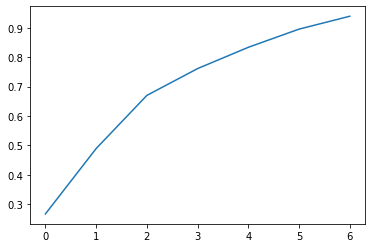

In [393]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Représentez des magasins sur les composantes principales

In [394]:
df_components = pd.DataFrame(pca.components_).T
df_components["Original Feature"] = data_pca.columns
l = list(range(10))
new_l = ["PC-" + str(i) for i in l]
df_components = df_components.rename(columns=dict(zip(l, new_l)))
df_components

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,Original Feature
0,-0.354221,0.164189,0.243521,-0.302680,0.396913,0.090821,0.124271,Montant total
1,-0.353409,0.153704,0.237238,-0.316479,0.403067,0.092728,0.139343,Ventes17_19
2,0.003700,0.492972,-0.084784,0.221668,0.079290,0.098924,-0.055245,Prix de vente moyen
3,-0.292884,0.150986,0.345476,0.047071,-0.227114,-0.063809,-0.438848,Panier moyen  HT (Taux budget)
4,-0.286605,0.088355,0.329187,0.195979,-0.276637,-0.182958,-0.427839,Indice de vente
5,0.211192,-0.100232,-0.214229,-0.294421,0.259860,0.466554,-0.715557,Mall
6,0.390100,0.278016,0.183034,-0.091187,-0.061429,0.063626,0.022439,Iconique
7,-0.390100,-0.278016,-0.183034,0.091187,0.061429,-0.063626,-0.022439,Non_iconique
8,0.280714,-0.075282,0.460596,0.222768,0.204965,0.077887,0.031133,Statut Collection Produit_NINI PERMANENT
9,-0.167758,-0.019430,0.116798,-0.168730,-0.577472,0.710957,0.260621,Statut Collection Produit_PERMANENT


Analysez les composantes principales comme vu en cours : Quelles sont les variables les plus corrélées avec les composantes principales ? 

C:\Users\eminl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eminl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


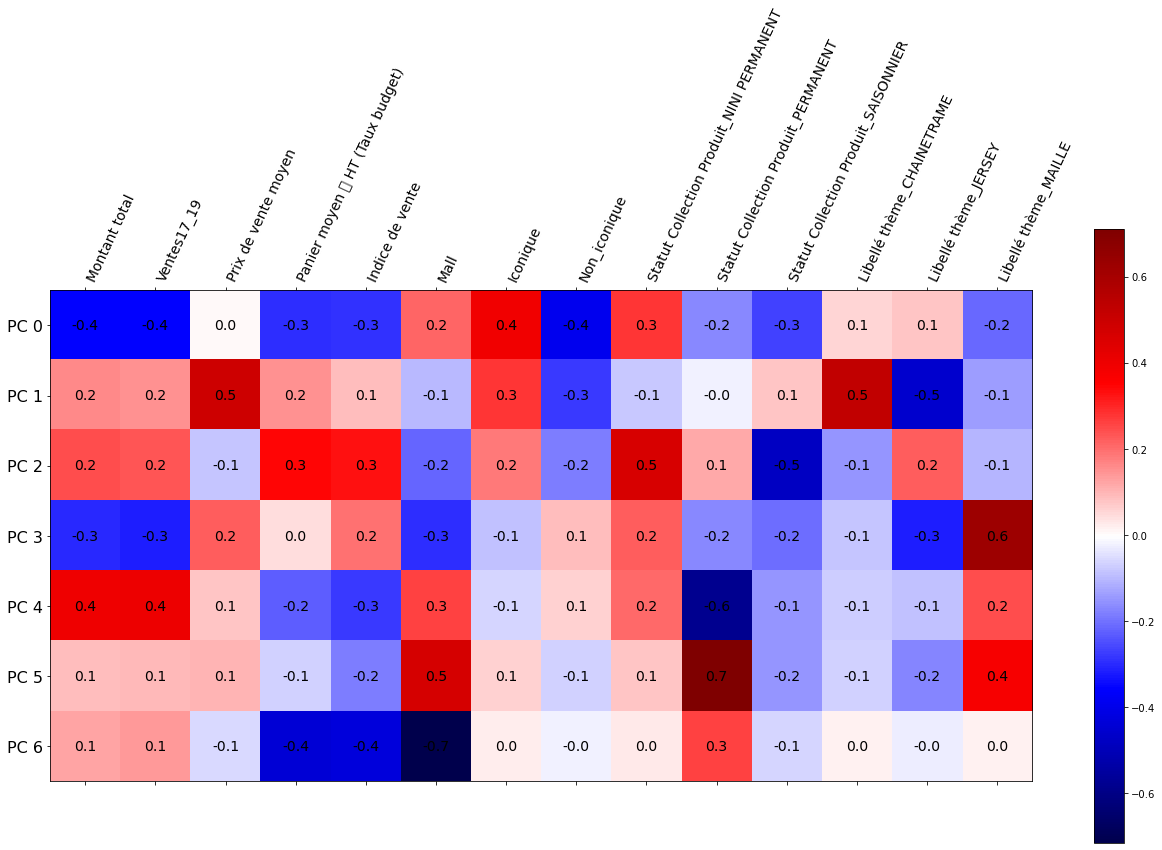

In [395]:
principalDf = pd.DataFrame(data = X_pca).rename(columns={i: "PC "+str(i) for i in range(X_pca.shape[1])})
finalDf = pd.concat([principalDf.reset_index(), data.reset_index()], axis = 1)

plt.figure(figsize=(22,11))
plt.matshow(pca.components_, cmap='seismic', fignum=1,)
for (i, j), z in np.ndenumerate(pca.components_):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', fontsize=14)
plt.yticks(range(X_pca.shape[1]),["PC "+str(i) for i in range(X_pca.shape[1])],fontsize=16)
plt.colorbar()
plt.xticks(range(len(data_pca.columns)),data_pca.columns,rotation=65,ha='left', fontsize=14)

plt.show()

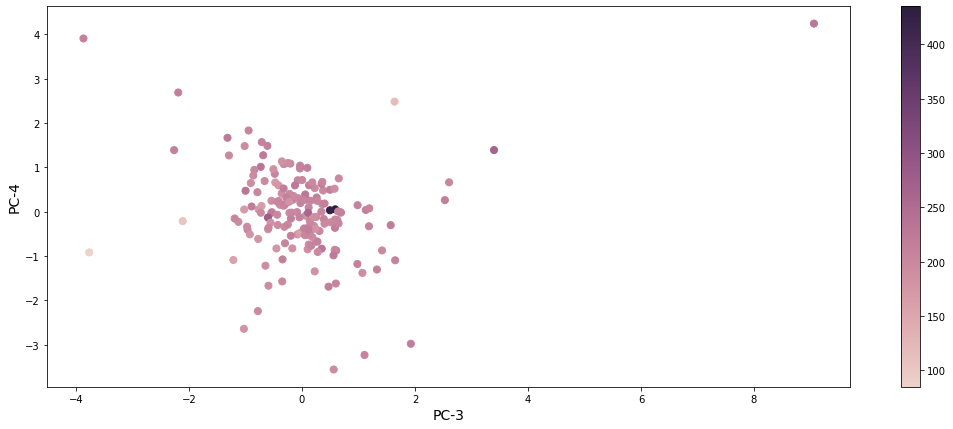

In [412]:
# Nuage de points des différents magasins en fonction des composantes principales (axes) et des ventes moyennes (couleur)

df_plot_pca = pd.DataFrame(X_pca)
df_plot_pca["Prix de vente moyen"] = data["Prix de vente moyen"]

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(18,7))

## Choisir les Composantes principales en X et en Y
x_pc = 3
y_pc = 4
points = ax.scatter(x=df_plot_pca[x_pc], 
                    y=df_plot_pca[y_pc], 
                    c=df_plot_pca["Prix de vente moyen"], 
                    s=50, 
                    cmap=cmap)
plt.xlabel("PC-"+str(x_pc), fontsize=14)
plt.ylabel("PC-"+str(y_pc), fontsize=14)
f.colorbar(points);

# III. Clustering

In [396]:
from sklearn.cluster import KMeans

## II.1. Méthode du coude pour définir le nombre de clusters

Il peut être intéressant de tester le clustering avec les données brutes, les données normalisées, et les données transformées avec l'ACP.

In [397]:
#Méthode du coude
data =  data.reset_index()
data_cluster = data.copy()
data_cluster = data_cluster.drop("Magasin", axis=1)

# Normalisation
cols_scale = list(data_cluster.columns)
scaler = StandardScaler()
data_cluster[cols_scale] = scaler.fit_transform(data_cluster[cols_scale])

In [398]:
data_cluster

,Montant total,Ventes17_19,Prix de vente moyen,Panier moyen  HT (Taux budget),Indice de vente,Mall,Iconique,Non_iconique,Statut Collection Produit_NINI PERMANENT,Statut Collection Produit_PERMANENT,Statut Collection Produit_SAISONNIER,Libellé thème_CHAINETRAME,Libellé thème_JERSEY,Libellé thème_MAILLE
0,0.883313,0.770501,0.605648,2.595483,-5.173127,-1.024100,-0.342211,0.342211,-0.112194,0.177446,0.094878,0.282942,-0.471226,0.269561
1,-0.436090,-0.473450,0.223253,0.237039,0.209823,-1.024100,-0.432638,0.432638,-0.166195,-0.462308,0.215402,0.197091,-0.501681,0.454555
2,1.207359,0.999764,0.875475,1.306625,-0.137629,0.976467,-0.430487,0.430487,-0.191934,-0.239396,0.218360,0.647902,-0.536132,-0.217877
3,0.670439,0.671124,0.209681,-0.249515,-0.186226,-1.024100,-0.368819,0.368819,-0.110394,0.157135,0.095159,0.396063,-0.302190,-0.172488
4,-0.508330,-0.528369,0.037956,0.430280,0.483108,-1.024100,-0.132757,0.132757,-0.131680,1.266845,0.002081,-0.075376,0.006935,0.110625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.330158,0.375610,-0.019811,0.428899,0.308999,-1.024100,-0.087217,0.087217,-0.024244,0.617472,-0.039281,0.107782,-0.075180,-0.057793
164,0.285079,0.271003,0.218680,1.811305,1.755748,0.976467,-0.163972,0.163972,-0.028435,0.756122,-0.049364,-0.240351,-0.069718,0.494006
165,0.236661,0.181215,0.404901,1.915202,0.731006,0.976467,-0.114283,0.114283,-0.042472,0.550746,-0.014001,0.087594,-0.297798,0.317132
166,-0.833633,-0.886648,0.290030,0.424071,-0.222806,0.976467,0.667953,-0.667953,-0.098041,0.649445,0.031875,0.174343,0.141743,-0.498580


C:\Users\eminl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


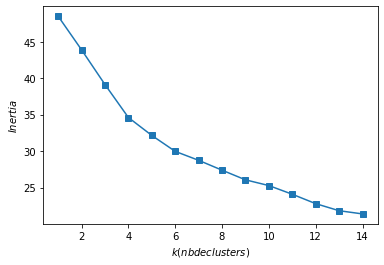

In [399]:
# Entrainer un k-means ici
inertia = []
for k in range(1, 15, 1):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_cluster)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 15, 1), inertia, marker='s');
plt.xlabel('$k (nb de clusters)$')
plt.ylabel('$Inertia$');

In [421]:
# Ajoutez les labels des clusters au dataframe
Nb_clusters = 6
kmeans = KMeans(n_clusters=Nb_clusters, random_state=1).fit(data_cluster)

# Ajout des Labels de cluster pour chaque store (ie à quel cluster appartient chaque store ?) au data set initial
data["Cluster"] = kmeans.labels_
data.head()

,Magasin,Montant total,Ventes17_19,Prix de vente moyen,Panier moyen  HT (Taux budget),Indice de vente,Mall,Iconique,Non_iconique,Statut Collection Produit_NINI PERMANENT,Statut Collection Produit_PERMANENT,Statut Collection Produit_SAISONNIER,Libellé thème_CHAINETRAME,Libellé thème_JERSEY,Libellé thème_MAILLE,Cluster
0,Magasin_1,512234,2283,224.368813,396.439363,0.000000,0,0.407797,0.592203,0.011827,0.014017,0.974157,0.443276,0.377573,0.179150,1
1,Magasin_10,181469,856,211.996495,266.656273,1.479903,0,0.396028,0.603972,0.007009,0.008178,0.984813,0.432243,0.373832,0.193925,1
2,Magasin_100,593470,2546,233.098979,325.514678,1.384380,1,0.396308,0.603692,0.004713,0.010212,0.985075,0.490181,0.369599,0.140220,4
3,Magasin_101,458868,2169,211.557400,239.881670,1.371019,0,0.404334,0.595666,0.011987,0.013831,0.974182,0.457815,0.398340,0.143845,1
4,Magasin_102,163359,793,206.001261,277.290152,1.555035,0,0.435057,0.564943,0.010088,0.023960,0.965952,0.397226,0.436318,0.166456,1


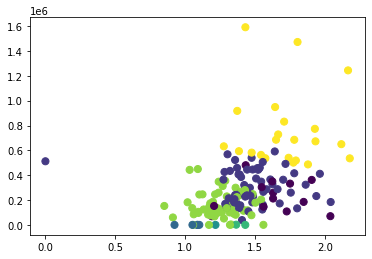

In [401]:
plt.scatter(data.iloc[:,5], data.iloc[:,1], c = kmeans.labels_, s=50, cmap= "viridis")

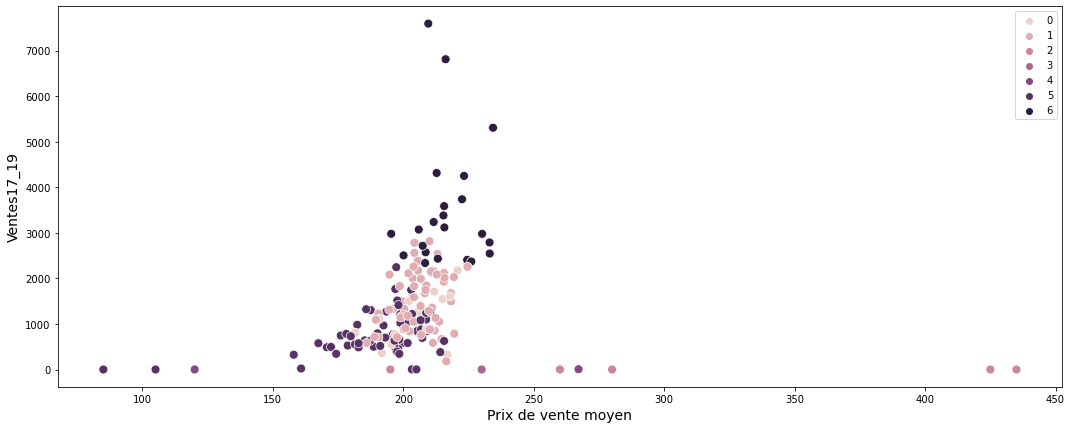

In [413]:
## Visualisation des clusters

# Changer les axes X et Y pour voir la répartition des clusters...
x_axis = "Prix de vente moyen"
y_axis = "Ventes17_19"

plt.figure(figsize=(18,7))

sns.scatterplot(
    x = data[x_axis],
    y = data[y_axis],
    hue = data["Cluster"],
    s=80,
)

plt.xlabel(x_axis, fontsize=14)
plt.ylabel(y_axis, fontsize=14)
plt.legend()
plt.show()

### Caractéristisation des clusters :

Analysez chacun des clusters : Quelle est la distribution des variables ? Nous vous invitons à filtrer sur chacun des clusters et à établir des statistiques.

Taille du cluster : 22, (13.0% des magasins)


C:\Users\eminl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eminl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eminl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

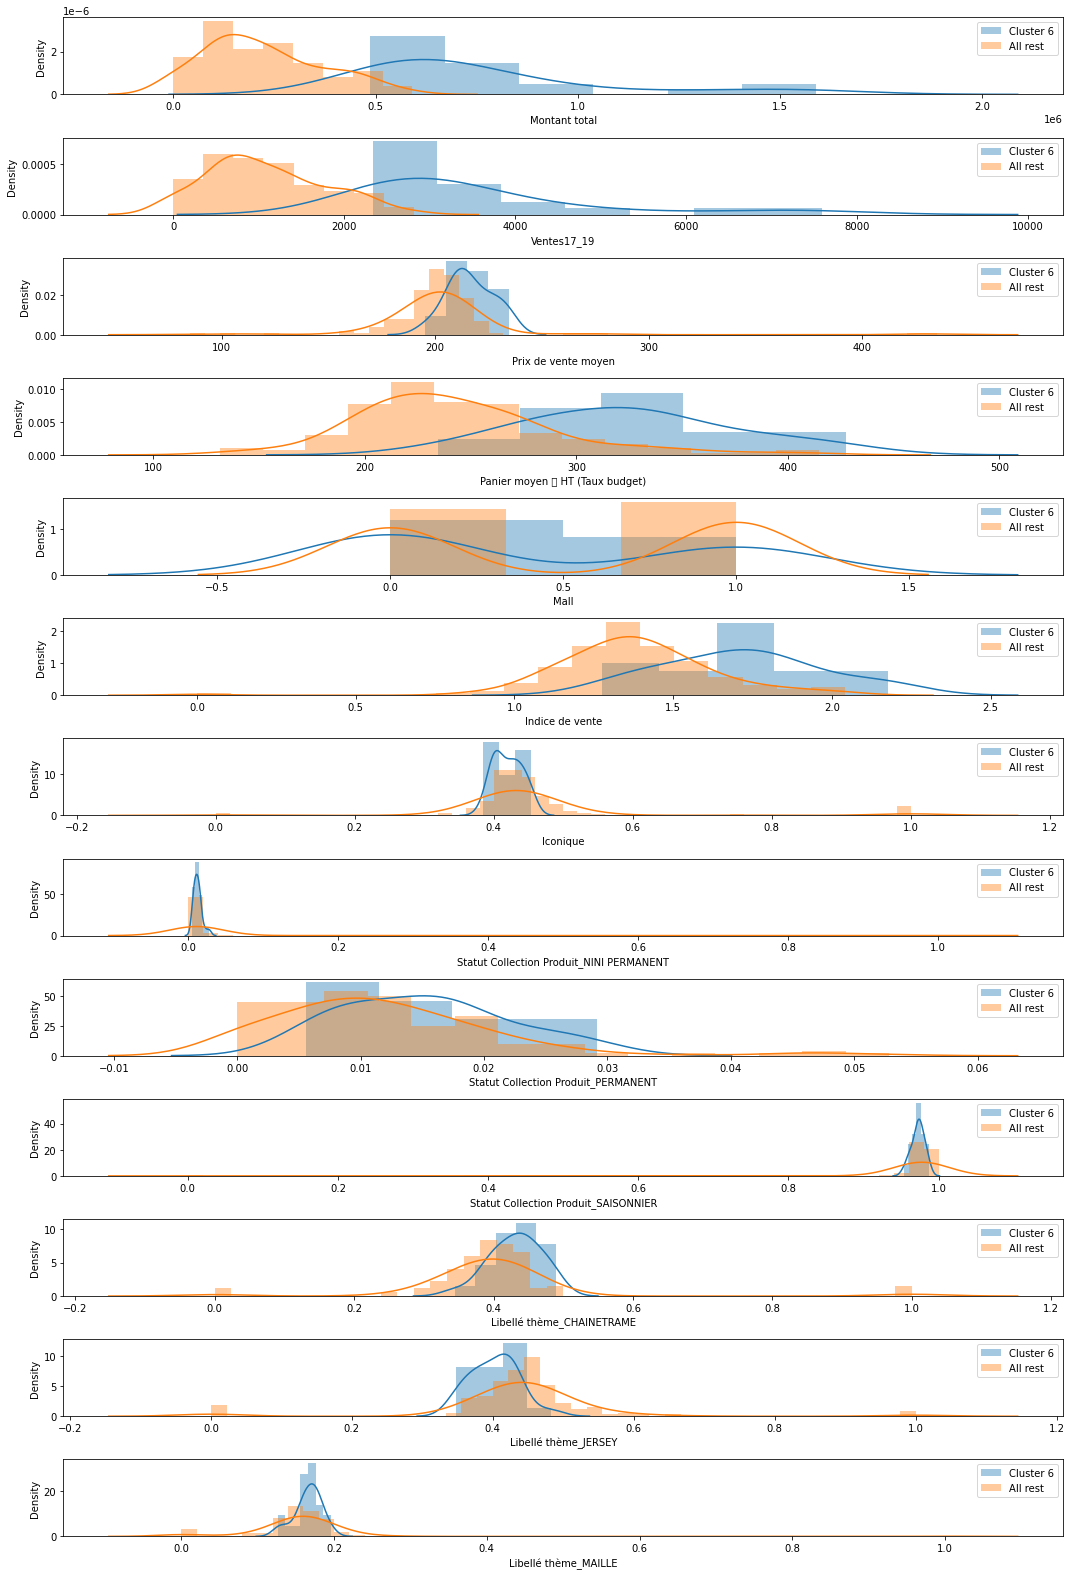

In [420]:
## Caractérisation de chaque cluster en regardant les distributions des variables dans le clusters VS ailleurs

num_cols = ["Montant total",
	        "Ventes17_19",	"Prix de vente moyen",
    	    "Panier moyen  HT (Taux budget)", "Mall",
        	"Indice de vente", "Iconique",
            "Statut Collection Produit_NINI PERMANENT",	
            "Statut Collection Produit_PERMANENT",	
            "Statut Collection Produit_SAISONNIER",	"Libellé thème_CHAINETRAME",
            "Libellé thème_JERSEY",	"Libellé thème_MAILLE", 
           ]

# Numéro du cluster
n_cluster = 6
df_cluster = data[data.Cluster==n_cluster]
df_others = data[data.Cluster!=n_cluster]

print("Taille du cluster : {}, ({}% des magasins)".format(len(df_cluster), np.round(100*len(df_cluster)/len(data))))

 
f, ax = plt.subplots(13, 1, figsize=(15,22)) 
for i in range(len(num_cols)) :  
    sns.distplot(df_cluster[num_cols[i]], hist=True, label="Cluster " + str(n_cluster), ax=ax[i])
    sns.distplot(df_others[num_cols[i]], hist=True, label="All rest", ax=ax[i])    

#     sns.histplot(x=df_cluster[num_cols[i]], stat = "probability", label="Cluster " + str(n_cluster), color="blue", alpha=0.5, ax=ax[i])
#     sns.histplot(x=df_others[num_cols[i]], stat = "probability", label="All rest", color="red", alpha=0.5, ax=ax[i])
    ax[i].legend()


plt.tight_layout()
plt.show()

Taille des clusters

In [422]:
data["Cluster"].value_counts()

5    68
1    67
4    25
0     5
3     2
2     1
Name: Cluster, dtype: int64

In [403]:
data.groupby("Cluster").mean()

,Montant total,Ventes17_19,Prix de vente moyen,Panier moyen  HT (Taux budget),Indice de vente,Iconique,Non_iconique,Statut Collection Produit_NINI PERMANENT,Statut Collection Produit_PERMANENT,Statut Collection Produit_SAISONNIER,Libellé thème_CHAINETRAME,Libellé thème_JERSEY,Libellé thème_MAILLE
Cluster,,,,,,,,,,,,,
0,233370.384615,1125.384615,204.248144,303.497936,1.621869,0.461435,0.538565,0.017783,0.030953,0.951264,0.400563,0.432638,0.166799
1,309474.774194,1494.209677,206.126911,261.549192,1.480921,0.418564,0.581436,0.011070,0.011562,0.977368,0.413681,0.422790,0.163529
2,371.000000,1.200000,319.000000,196.012367,1.050035,0.900000,0.100000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,230.000000,1.000000,230.000000,148.188176,1.216535,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,1055.000000,4.500000,193.571429,259.374751,1.397271,1.000000,0.000000,0.785714,0.000000,0.214286,0.214286,0.714286,0.071429
5,157764.825397,805.301587,190.350980,216.527414,1.253414,0.449288,0.550712,0.014417,0.009948,0.975635,0.358452,0.492714,0.148834
6,758577.954545,3501.409091,216.479564,325.323012,1.718399,0.419885,0.580115,0.012320,0.015309,0.972372,0.431583,0.402337,0.166080


In [404]:
mags_df.mean()

Montant total                                2.907937e+05
Ventes17_19                                  1.399119e+03
Prix de vente moyen                          2.047732e+02
Panier moyen  HT (Taux budget)              2.536122e+02
Indice de vente                              1.422217e+00
Mall                                        5.952447e+162
Iconique                                     4.523347e-01
Non_iconique                                 5.476653e-01
Statut Collection Produit_NINI PERMANENT     2.183481e-02
Statut Collection Produit_PERMANENT          1.239708e-02
Statut Collection Produit_SAISONNIER         9.657681e-01
Libellé thème_CHAINETRAME                    4.069130e-01
Libellé thème_JERSEY                         4.354658e-01
Libellé thème_MAILLE                         1.576212e-01
dtype: float64

**Portez une attention particulière à l'analyse et l'interprétation des premiers résultats du clustering. Ces résultats pourront vous inspirer la création de nouvelles variables plus pertinentes, ou l'adoption d'une nouvelle démarche. Par exemple, si on trouve un cluster principal qui contient la majorité des magasins et d'autres clusters avec un très faible nombre de magasins, il peut être intéressant de les écarter et de refaire un clustering uniquement sur le gros cluster.**

**On tombe rarement sur la bonne réponse du premier coup, c'est une approche très itérative.**


## On va essayer une autre methode "Classification hiérarchique"

In [405]:
mags_df.shape

(168, 14)

In [406]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(mags_df, "complete")
hc_average = linkage(mags_df, "average")
hc_single = linkage(mags_df, "single")

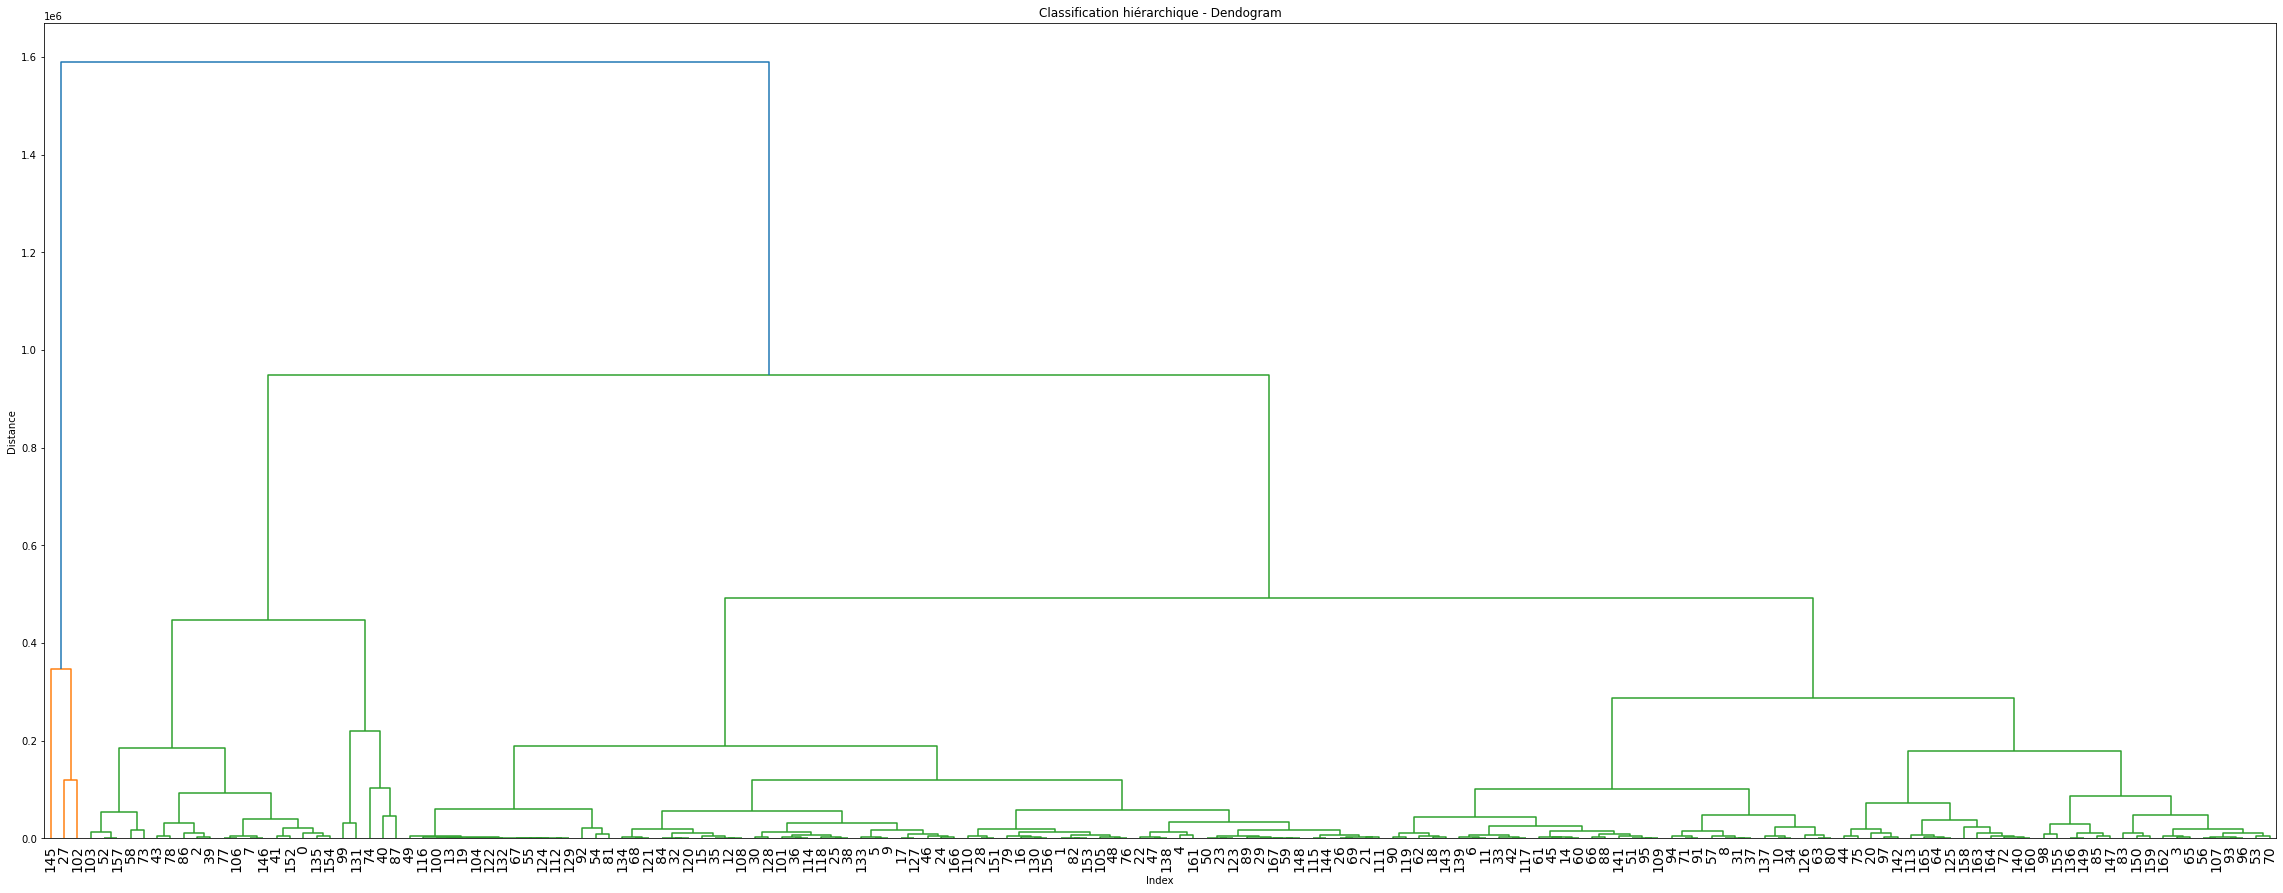

In [407]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(40, 15))
plt.title('Classification hiérarchique - Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    leaf_font_size=14
);

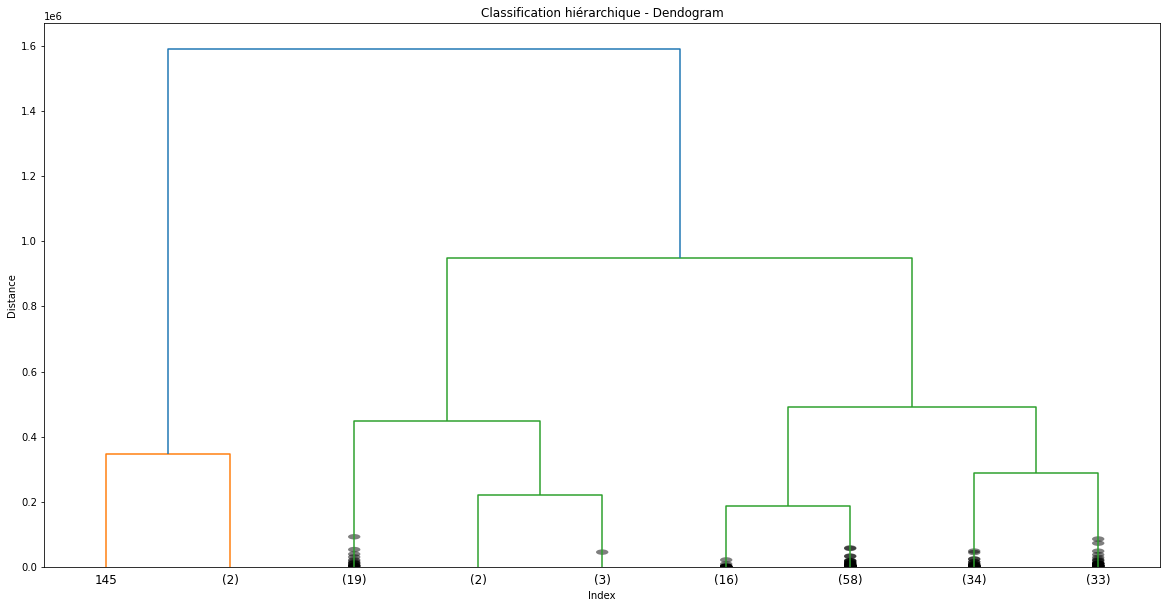

In [408]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(20, 10))
plt.title('Classification hiérarchique - Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 9,
    show_contracted = True
);

In [410]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 6, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(mags_df)

array([4, 3, 4, 4, 3, 3, 0, 4, 0, 3, 0, 0, 3, 5, 0, 3, 3, 3, 0, 5, 0, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 4, 1, 4, 0, 4,
       0, 0, 3, 3, 3, 5, 3, 0, 1, 4, 3, 5, 4, 0, 1, 3, 0, 0, 0, 0, 0, 4,
       0, 5, 3, 3, 4, 0, 0, 1, 1, 0, 3, 4, 4, 3, 0, 3, 3, 4, 3, 4, 4, 1,
       0, 3, 0, 0, 3, 4, 0, 0, 4, 0, 4, 1, 5, 3, 2, 1, 5, 3, 4, 4, 3, 0,
       3, 3, 5, 0, 3, 3, 5, 0, 3, 0, 3, 3, 5, 3, 5, 0, 0, 3, 3, 5, 3, 1,
       5, 3, 3, 4, 4, 0, 3, 0, 0, 0, 0, 0, 3, 2, 4, 4, 3, 4, 4, 3, 4, 3,
       4, 4, 3, 1, 0, 4, 0, 3, 4, 0, 0, 0, 3, 3], dtype=int64)

In [411]:
pd.DataFrame({"Magasin" : mags_df.index, "Cluster": cluster.fit_predict(mags_df)})

,Magasin,Cluster
0,Magasin_1,4
1,Magasin_10,3
2,Magasin_100,4
3,Magasin_101,4
4,Magasin_102,3
...,...,...
163,Magasin_92,0
164,Magasin_94,0
165,Magasin_97,0
166,Magasin_98,3
